## Table of Contents
#### 1.0 Introduction
    1.1 Description of the data 
    1.2 Load libraries and helper functions
    1.3 Load data
    1.4 File structure and content
#### 2.0 Exploratory Data Analysis (EDA)
        2.1 Data Visualization
        2.2 Data Transformation
        2.3 Missing Values and Outlier Treatment
        2.4 Detailed EDA of Cancellation of Subscriptions
        2.5 Detailed EDA of Back order effect
        
#### 3.0 Variable selection
#### 4.0 Modelling with 3 intending algorithms - GLM, KNN and Random Forest
#### 5.0 Model assessment and accuracy check

## 1.0 Introduction
Here we perform an EDA

#### Description of the data
The data consists of three separate files and each has one table:
<ol>
    <li>A CUSTOMER table, with one line per customer, with the following fields:
        <ol>
            <li>Customer ID</li>
            <li>First Product purchased (A, B or A+B)</li>
            <li>First option selected (OTP or membership)</li>
            <li>First order created (when the customer made their first purchase)</li>
            <li>First order fulfilled (when that first order was shipped)</li>
            <li>Chanel attribution (where the customer comes from, i.e. Facebook, podcast, ...) </li>
         </ol>
    </li>
    <li>An ORDER table, with one line per order, with the following fields:
        <ol>
           <li>Customer ID </li>
           <li>Order ID</li>
           <li># of A bottles purchased</li>
           <li># of B bottles purchased</li>
           <li>When the order was placed</li>
           <li>When the order is fulfilled</li>
           <li>Purchase option for that order (if we have a mix of OTP and membership, we choose membership)</li>
        </ol>
    </li>

<li>A SUBSCRIPTION table, with one line per event linked to a subscription, with the following fields
    <ol>
        <li>Customer ID</li>
        <li>Subscription ID</li>
        <li>Product (A or B)</li>
        <li>Created date</li>
        <li>Cancelled date</li>
        <li>Last update date</li>
        <li>Status (Active or cancelled)</li>
        <li>Current status (active or cancelled)</li>
        <li>Cancellation reason</li>
    </ol>
 </li>
</ol>

### Load libraries and helper functions

In [1]:
# install.packages("pacman") #installing the pacman package that helps us install other packages
library(pacman) #loading pacman

# install.packages(c("tm", "SnowballC", "wordcloud", "RColorBrewer", "RCurl", "XML"))
# p_load("tm", "SnowballC", "wordcloud", "RColorBrewer", "RCurl", "XML", "caret")

In [2]:
p_load(tidyverse,readxl, writexl, rstatix, ggplot2, scales, grid, gridExtra, RColorBrewer, corrplot, 
      tibble, readr, stringr, forcats, lubridate, ggforce, ggridges, anytime, vcd, , MASS, companion, lsr, vcd, DescTools, crossTab,
      tm, SnowballC, wordcloud, RColorBrewer, RCurl, XML, caret, tidytext)

also installing the dependencies ‘quantreg’, ‘car’





  There are binary versions available but the source versions are later:
         binary source needs_compilation
quantreg   5.85   5.88              TRUE
car      3.0-10 3.0-12             FALSE


The downloaded binary packages are in
	/var/folders/nt/h_m3v6j50t33f2r8wyjlbz100000gn/T//RtmplI0sd3/downloaded_packages


installing the source packages ‘quantreg’, ‘car’


Warning message in utils::install.packages(package, ...):
“installation of package ‘quantreg’ had non-zero exit status”
Warning message in utils::install.packages(package, ...):
“installation of package ‘car’ had non-zero exit status”

rstatix installed

also installing the dependency ‘lmtest’





  There is a binary version available but the source version is later:
       binary source needs_compilation
lmtest 0.9-39 0.9-40              TRUE


The downloaded binary packages are in
	/var/folders/nt/h_m3v6j50t33f2r8wyjlbz100000gn/T//RtmplI0sd3/downloaded_packages


installing the source package ‘lmtest’


Warning message in utils::install.packages(package, ...):
“installation of package ‘lmtest’ had non-zero exit status”

vcd installed


Your package installed

Warning message:
“package ‘companion’ is not available (for R version 3.6.3)”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘companion’”
also installing the dependency ‘lmtest’





  There is a binary version available but the source version is later:
       binary source needs_compilation
lmtest 0.9-39 0.9-40              TRUE


The downloaded binary packages are in
	/var/folders/nt/h_m3v6j50t33f2r8wyjlbz100000gn/T//RtmplI0sd3/downloaded_packages


installing the source package ‘lmtest’


Warning message in utils::install.packages(package, ...):
“installation of package ‘lmtest’ had non-zero exit status”

vcd installed

Warning message:
“package ‘crossTab’ is not available (for R version 3.6.3)”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘crossTab’”
Warning message in p_load(tidyverse, readxl, writexl, rstatix, ggplot2, scales, :
“Failed to install/load:
rstatix, vcd, , companion, vcd, crossTab”


### Load dataset

In [3]:
# Define multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [4]:
customers_df = read.csv("data/customers.csv", header=TRUE, sep =",") #load customers dataset on the "customers_df" variable
subscription_df = read.csv("data/subscription.csv", header=TRUE, sep =",")  #load subscription data set on the "subscription_df" variable
orders_df = read.csv("data/orders.csv", header=TRUE, sep =",") #load orders dataset on the "orders_df" variable

### File Structure and Contents
Here, we will have an overview of the data sets

We will start with the Customers data set

In [5]:
#taking a look at the shape of each data set
customers_df %>% dim()

[1] 9656    6

In [6]:
customers_df %>% head()

,First_product,First_option,First_order_created,First_order_fulfilled,Channel_attribution,Customer_id
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,B,Membership,2021-10-11T12:14:21Z,2021-11-04T15:32:09Z,Nutrition,Customer_1
2,A+B,OTP,2021-11-12T11:14:58Z,NA,Podcast Interview,Customer_2
3,B,Membership,2021-02-20T11:48:45Z,2021-04-05T15:02:24Z,NA,Customer_3
4,B,Membership,2021-05-24T18:41:02Z,2021-06-01T16:08:38Z,Facebook,Customer_4
5,B,OTP,2021-08-04T16:58:03Z,2021-08-09T15:10:17Z,Social,Customer_5
6,A,Membership,2021-12-01T22:28:23Z,2021-12-27T16:55:36Z,NA,Customer_6


In [7]:
customers_df %>% summary()

 First_product     First_option            First_order_created
 A   :3744     Membership:6916   2021-07-05T14:59:23Z:   2    
 A+B : 182     OTP       :2740   2021-09-25T12:06:48Z:   2    
 B   :5710                       2021-11-29T10:07:53Z:   2    
 NA's:  20                       2020-12-31T05:40:37Z:   1    
                                 2020-12-31T07:29:19Z:   1    
                                 2020-12-31T07:39:31Z:   1    
                                 (Other)             :9647    
          First_order_fulfilled        Channel_attribution        Customer_id  
 2021-09-15T15:03:50Z:   2      Podcast Interview:1048     Customer_1   :   1  
 2021-01-06T16:00:33Z:   1      Search           : 926     Customer_10  :   1  
 2021-01-13T16:00:46Z:   1      Social           : 783     Customer_100 :   1  
 2021-01-13T16:01:44Z:   1      Facebook         : 612     Customer_1000:   1  
 2021-01-13T16:01:45Z:   1      Direct Mail      : 596     Customer_1001:   1  
 (Other)        

In [8]:
#Check Data types
customers_df %>% glimpse()

Rows: 9,656
Columns: 6
$ First_product         <fct> B, A+B, B, B, B, A, B, B, A, B, A, B, A, A, A, A…
$ First_option          <fct> Membership, OTP, Membership, Membership, OTP, Me…
$ First_order_created   <fct> 2021-10-11T12:14:21Z, 2021-11-12T11:14:58Z, 2021…
$ First_order_fulfilled <fct> 2021-11-04T15:32:09Z, NA, 2021-04-05T15:02:24Z, …
$ Channel_attribution   <fct> Nutrition, Podcast Interview, NA, Facebook, Soci…
$ Customer_id           <fct> Customer_1, Customer_2, Customer_3, Customer_4, …


Next, we look at the Subscription data

In [9]:
subscription_df %>% dim()

[1] 15036     9

In [10]:
subscription_df %>% summary()

 Product  Subscription_id                    Created_at   
 A:5788   Min.   : 89559464   2021-12-16T14:43:22Z:   12  
 B:9248   1st Qu.:203276101   2021-11-22T08:09:02Z:   10  
          Median :203285245   2021-12-02T11:13:35Z:   10  
          Mean   :191584213   2021-12-16T02:33:29Z:   10  
          3rd Qu.:203296820   2021-12-14T12:20:04Z:    9  
          Max.   :207275137   2021-12-14T16:50:48Z:    9  
                              (Other)             :14976  
               Cancelled_at                 Updated_at          Status    
 2021-11-29T00:00:00Z:  49   2022-01-29T00:19:49Z:    9   Active   :9827  
 2021-12-08T00:00:00Z:  42   2021-12-13T08:17:05Z:    8   Cancelled:5201  
 2021-11-22T00:00:00Z:  38   2021-12-13T08:42:26Z:    7   Expired  :   6  
 2021-11-08T00:00:00Z:  36   2021-12-13T08:04:52Z:    6   Onetime  :   2  
 2021-12-06T00:00:00Z:  36   2021-12-13T08:16:59Z:    6                   
 (Other)             :4844   2021-12-13T08:17:04Z:    6                   
 NA

In [11]:
subscription_df %>% glimpse()

Rows: 15,036
Columns: 9
$ Product             <fct> A, B, B, A, B, B, B, B, B, A, B, A, B, A, A, B, B,…
$ Subscription_id     <int> 203282516, 148108899, 203290744, 203288690, 203288…
$ Created_at          <fct> 2021-09-22T17:48:12Z, 2021-04-20T19:20:35Z, 2021-0…
$ Cancelled_at        <fct> 2022-03-07T19:49:32Z, 2022-03-07T18:29:31Z, 2022-0…
$ Updated_at          <fct> 2022-03-07T19:49:32Z, 2022-03-07T18:29:31Z, 2022-0…
$ Status              <fct> Cancelled, Cancelled, Cancelled, Cancelled, Cancel…
$ Current_status      <fct> Cancelled, Cancelled, Cancelled, Cancelled, Cancel…
$ Cancellation_reason <fct> "Other reason", "Other reason", "This is too expen…
$ Customer_id         <fct> Customer_8571, Customer_5185, Customer_8476, Custo…


In [12]:
orders_df %>% dim()

[1] 22967     7

In [13]:
orders_df %>% summary()

    Order_id                       Created_date               Fulfillment_date
 Min.   :2.720e+12   2021-05-25T00:17:13Z:    3   2021-05-05T16:00:57Z:    2  
 1st Qu.:3.873e+12   2021-06-10T00:39:53Z:    3   2021-05-10T15:04:41Z:    2  
 Median :3.989e+12   2021-06-10T00:41:06Z:    3   2021-06-16T15:01:14Z:    2  
 Mean   :3.944e+12   2021-06-12T00:26:28Z:    3   2021-06-28T14:19:40Z:    2  
 3rd Qu.:4.077e+12   2021-06-24T00:53:20Z:    3   2021-06-28T14:33:47Z:    2  
 Max.   :4.135e+12   2021-06-24T00:54:21Z:    3   (Other)             :22202  
                     (Other)             :22949   NA's                :  755  
  Nb_a_bottles      Nb_b_bottles            Option             Customer_id   
 Min.   : 0.0000   Min.   : 0.0000   Membership:19656   Customer_9256:   20  
 1st Qu.: 0.0000   1st Qu.: 0.0000   Other     :   69   Customer_7449:   16  
 Median : 0.0000   Median : 1.0000   OTP       : 3242   Customer_8061:   16  
 Mean   : 0.3537   Mean   : 0.7762                      

In [14]:
orders_df %>% glimpse()

Rows: 22,967
Columns: 7
$ Order_id         <dbl> 3.962467e+12, 3.972522e+12, 4.089988e+12, 4.082712e+1…
$ Created_date     <fct> 2021-09-21T13:36:19Z, 2021-09-27T13:31:37Z, 2021-11-3…
$ Fulfillment_date <fct> NA, 2021-11-09T15:51:04Z, 2021-12-02T12:20:38Z, 2021-…
$ Nb_a_bottles     <int> 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,…
$ Nb_b_bottles     <int> 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,…
$ Option           <fct> Membership, Membership, Membership, Membership, Membe…
$ Customer_id      <fct> Customer_5480, Customer_5480, Customer_5480, Customer…


<p>Customers: </p>
<ul>
    <li>Customers: 9656 rows (customers) and 6 columns (variables)</li>
   
<li>3744 customers purchased product A, 5710 purchased product B and 182 purchased prodct A and B as the first product</li>
<li>There are 6916 and 2740 customers that subscription through Membership and OTP (One Time Payment) respectively.<br> All customers subscribed to a payment method.</li>
<li>In the Channel Attribution, 1048 customers come from Podcast interview, 926 from Search (I assume this is generic search like Google), 783 from Social (maybe social media platforms), 612 from Facebook, 596 from Direct Mail, and 3833 from Other (like CTV, Partner, Promotion - to be explored further)</li>
<li>All customers made their first purchased.</li>
    </ul>

<p>Subscription:</p>
<ul>
    <li>15036 records and 9 columns</li>
    <li> 6 expired accounts, and 2 one-time account</li>
    <li> 5788 and 9248 subscribed to product A and B respectively</li>       
    
 </ul>
 
 <p>Orders:</p>
 <ul>
    <li>22967 records and 7 columns</li>
    <li>19656 orders by Membership subcribers, 3242 from OTP, and 69 from others</li>
    <li> Some orders are between 10 and 20</li>
   </ul>
 <ul>  
    <li>There are a lot of NAs across the tables. I suspect NAs could be missing values. It will be explored</li>
    <li>The data types are not well defined for the variables (columns), we will need to have features reformatting later as we progress</li>
    </ul>

<p><b>Observation on all the three data sets</b> </p>
<ul>
    <li>The shape (dimension) of the data sets are not the same </li>
    <li>All the data sets have <b>Customer ID</b> in common </li>
    </ul>

### EDA
#### Univariate Analysis - Visualization

In [15]:
print("Graphs...")
cat_graph1 <- customers_df %>%

  ggplot(aes(First_product, fill = First_product)) +

  geom_bar() +

  theme(legend.position = "none")


cat_graph2 <- customers_df %>%

  ggplot(aes(First_option, fill = First_option)) +

  geom_bar() +

  theme(legend.position = "none")


cat_graph3 <- customers_df %>%

  ggplot(aes(Channel_attribution, fill = Channel_attribution)) +

  geom_bar() +

  theme(legend.position = "none")+ theme_minimal(base_size = 10)


cat_graph4 <- orders_df %>%

  ggplot(aes(Nb_a_bottles, fill = Nb_a_bottles)) +

  geom_bar() +

  theme(legend.position = "none")


cat_graph5 <- orders_df %>%

  ggplot(aes(Nb_b_bottles, fill = Nb_b_bottles)) +

  geom_bar() +

  theme(legend.position = "none")


cat_graph6 <- subscription_df %>%

  ggplot(aes(Product, fill = Product)) +

  geom_bar() +

  theme(legend.position = "none")


cat_graph7 <- subscription_df %>%

  ggplot(aes(Status, fill = Status)) +

  geom_bar() +

  theme(legend.position = "none")


cat_graph8 <- subscription_df %>%

  ggplot(aes(Current_status, fill = Current_status)) +

  geom_bar() +

  theme(legend.position = "none")

layout <- matrix(c(1,1,2,2),2,4, byrow=TRUE)

[1] "Graphs..."


#### First Product purached (left), and Subscription Method (right) by the Customers

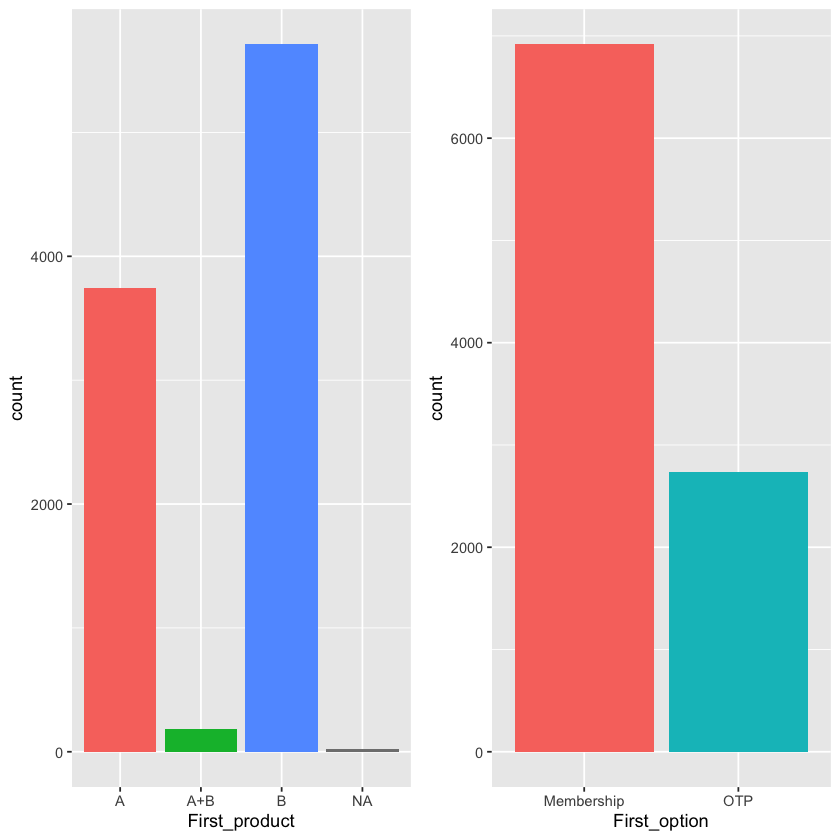

In [16]:
multiplot(cat_graph1, cat_graph2, layout=layout)

#### Chancel Attricution of Customers

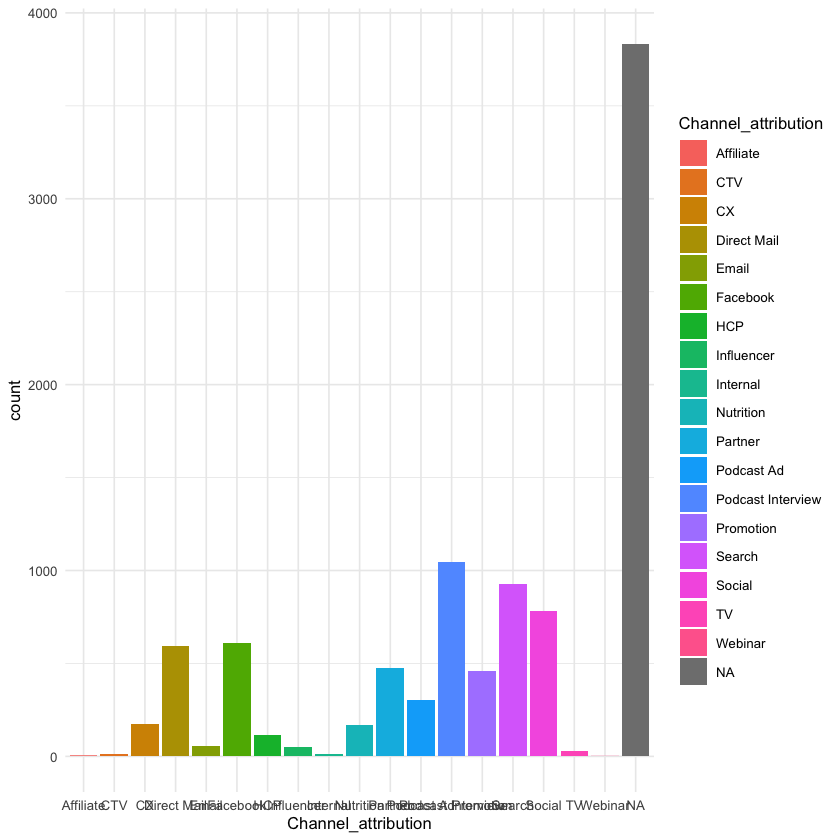

In [17]:
multiplot(cat_graph3, layout=layout)

NA - represents Missing values

#### Number of bottles ordered per Product. Product A (left), B (right)

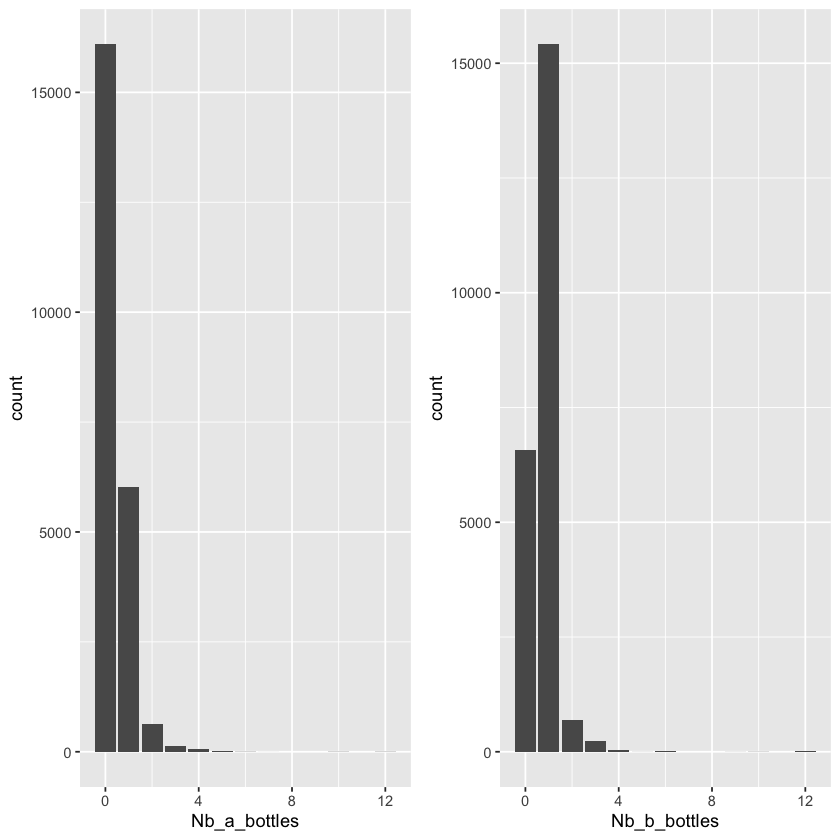

In [18]:
multiplot(cat_graph4, cat_graph5, layout=layout)

#### Product Subscription (left), Subscription Status (right)

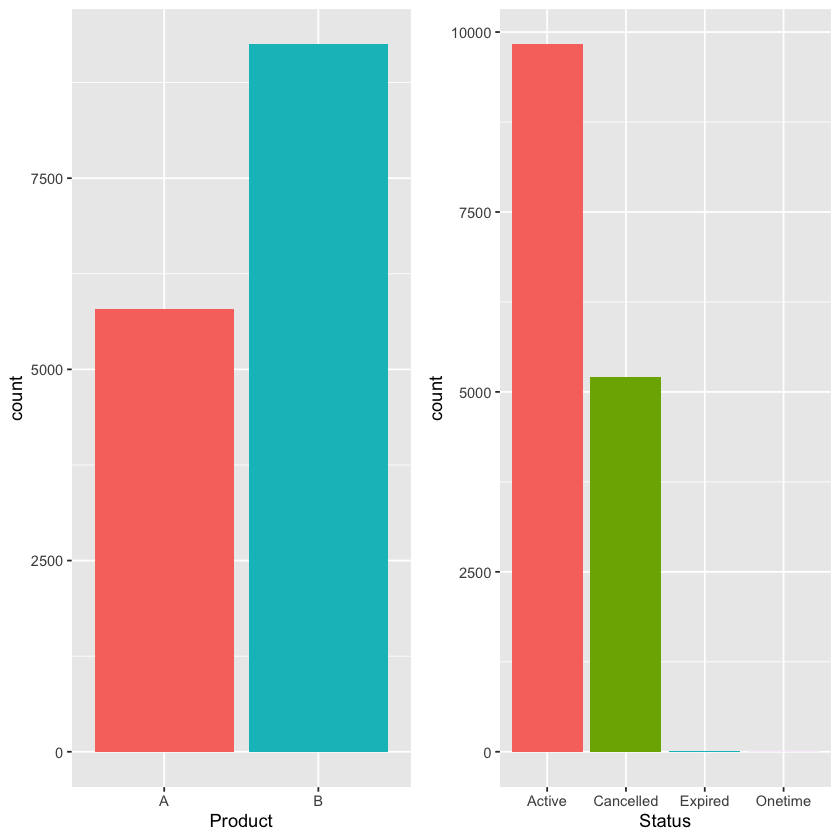

In [19]:
multiplot(cat_graph6, cat_graph7, layout=layout)

#### Subscription Current Status

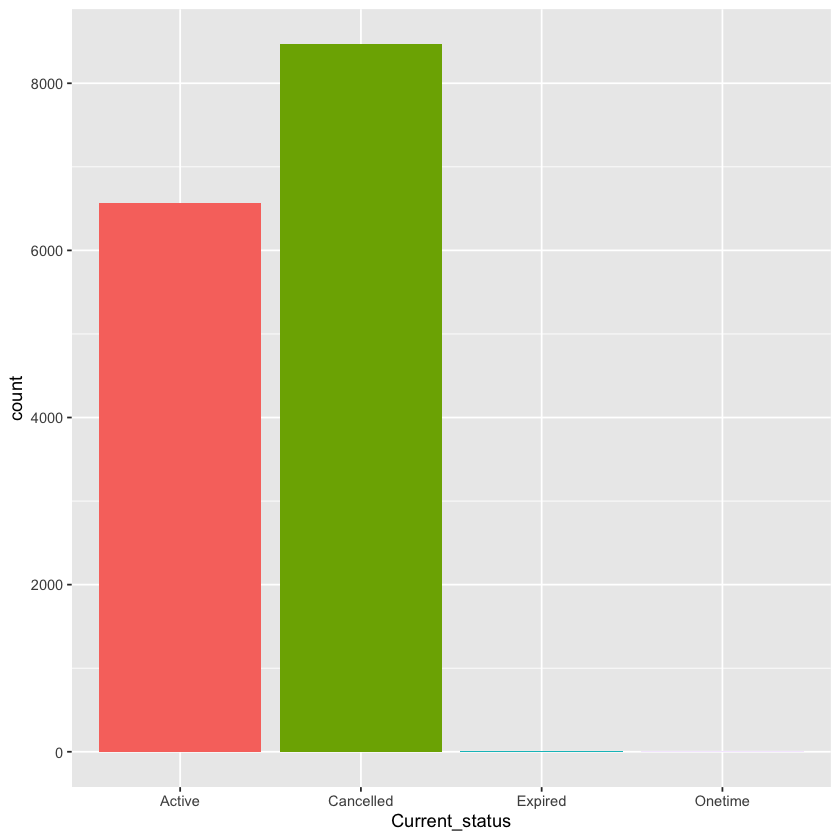

In [20]:
multiplot(cat_graph8, layout=layout)

In [21]:
#convert necessary variables to date/time format
customers_df$First_order_created <- ymd_hms(customers_df$First_order_created)
customers_df$First_order_fulfilled <- ymd_hms(customers_df$First_order_fulfilled)
orders_df$Created_date <- ymd_hms(orders_df$Created_date)
orders_df$Fulfillment_date <- ymd_hms(orders_df$Fulfillment_date)
subscription_df$Cancelled_at <- ymd_hms(subscription_df$Cancelled_at)
subscription_df$Updated_at <- ymd_hms(subscription_df$Updated_at)
subscription_df$Created_at <- ymd_hms(subscription_df$Created_at)

#### Time series visualization
<p> The plots below show the distribution/activities over time</p>

In [22]:
d1 <- customers_df %>%

  ggplot(aes(First_order_created)) +

  geom_freqpoly(color = "dark green", binwidth = 400)



d2 <- customers_df %>%

  mutate(wday = wday(First_order_created, label = TRUE)) %>%

  ggplot(aes(wday, fill = wday)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Day of the week")



d3 <- customers_df %>%

  #filter(First_order_created > ymd("20041231") & First_order_created < ymd("20170101")) %>%

  mutate(month = month(First_order_created, label = TRUE)) %>%

  ggplot(aes(month, fill = month)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Month of the year")



layout <- matrix(c(1,1,2,3),2,2,byrow=TRUE)





#### First Order created by the Customers

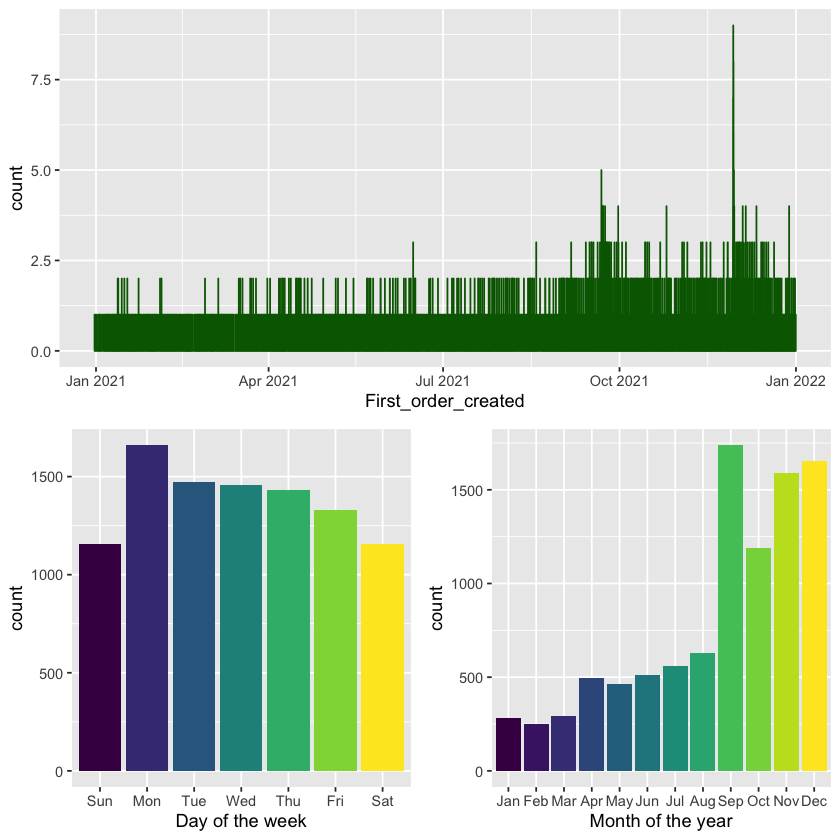

In [23]:
multiplot(d1, d2, d3, layout=layout)

In [24]:
d4 <- customers_df %>%

  ggplot(aes(First_order_fulfilled)) +

  geom_freqpoly(color = "dark green", binwidth = 400)



d5 <- customers_df %>%

  mutate(wday = wday(First_order_fulfilled, label = TRUE)) %>%

  ggplot(aes(wday, fill = wday)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Day of the week")



d6 <- customers_df %>%

  #filter(First_order_created > ymd("20041231") & First_order_created < ymd("20170101")) %>%

  mutate(month = month(First_order_fulfilled, label = TRUE)) %>%

  ggplot(aes(month, fill = month)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Month of the year")



layout <- matrix(c(1,1,2,3),2,2,byrow=TRUE)



#### Distribution of Fulfilment of orders over time

Warning message:
“Removed 240 rows containing non-finite values (stat_bin).”


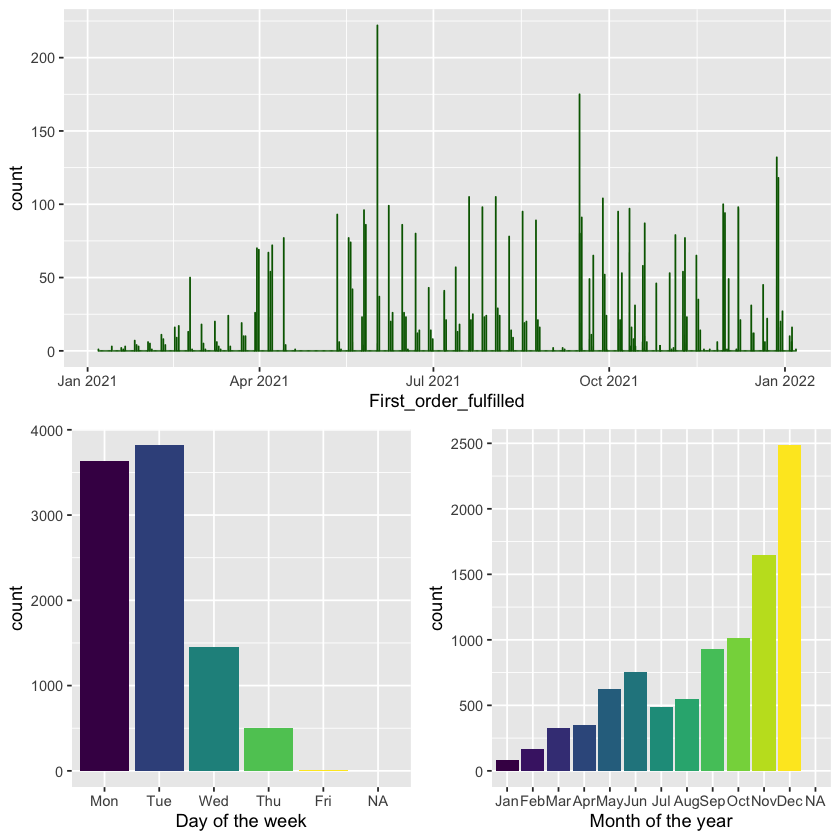

In [25]:
multiplot(d4, d5, d6, layout=layout)

In [26]:
d7 <- orders_df %>%

  ggplot(aes(Created_date)) +

  geom_freqpoly(color = "dark green", binwidth = 400)



d8 <- orders_df %>%

  mutate(wday = wday(Created_date, label = TRUE)) %>%

  ggplot(aes(wday, fill = wday)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Day of the week")



d9 <- orders_df %>%

  #filter(First_order_created > ymd("20041231") & First_order_created < ymd("20170101")) %>%

  mutate(month = month(Created_date, label = TRUE)) %>%

  ggplot(aes(month, fill = month)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Month of the year")



layout <- matrix(c(1,1,2,3),2,2,byrow=TRUE)



#### Distribution of Orders created over time

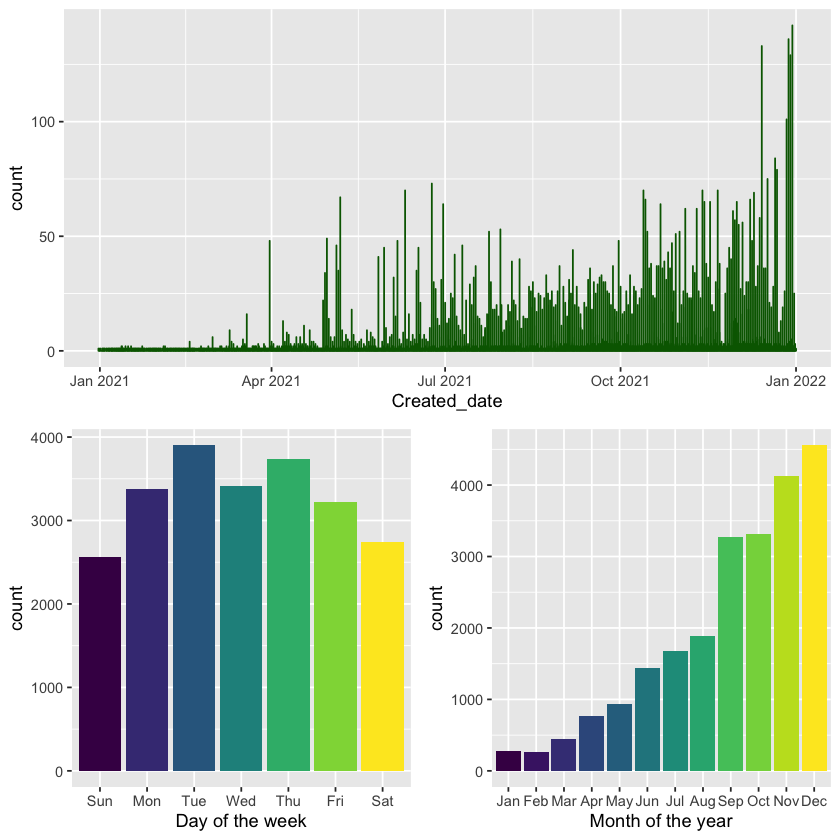

In [27]:
multiplot(d7, d8, d9, layout=layout)

In [28]:

d10 <- orders_df %>%

  ggplot(aes(Fulfillment_date)) +

  geom_freqpoly(color = "dark green", binwidth = 400)



d11 <- orders_df %>%

  mutate(wday = wday(Fulfillment_date, label = TRUE)) %>%

  ggplot(aes(wday, fill = wday)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Day of the week")



d12 <- orders_df %>%

  #filter(First_order_created > ymd("20041231") & First_order_created < ymd("20170101")) %>%

  mutate(month = month(Fulfillment_date, label = TRUE)) %>%

  ggplot(aes(month, fill = month)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Month of the year")



layout <- matrix(c(1,1,2,3),2,2,byrow=TRUE)



#### Dates when Orders were Fulfilled

Warning message:
“Removed 755 rows containing non-finite values (stat_bin).”


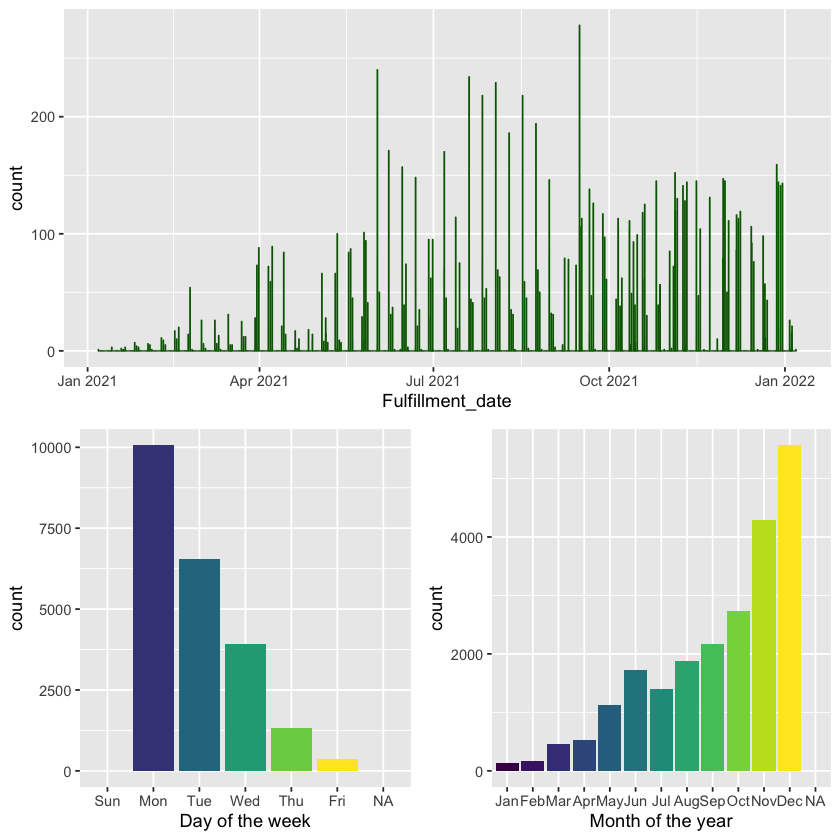

In [29]:
multiplot(d10, d11, d12, layout=layout)

In [30]:

d13 <- subscription_df %>%

  ggplot(aes(Created_at)) +

  geom_freqpoly(color = "dark green", binwidth = 400)



d14 <- subscription_df %>%

  mutate(wday = wday(Created_at, label = TRUE)) %>%

  ggplot(aes(wday, fill = wday)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Day of the week")



d15 <- subscription_df %>%

  #filter(First_order_created > ymd("20041231") & First_order_created < ymd("20170101")) %>%

  mutate(month = month(Created_at, label = TRUE)) %>%

  ggplot(aes(month, fill = month)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Month of the year")



layout <- matrix(c(1,1,2,3),2,2,byrow=TRUE)



#### The period over time when subscriptions were Created

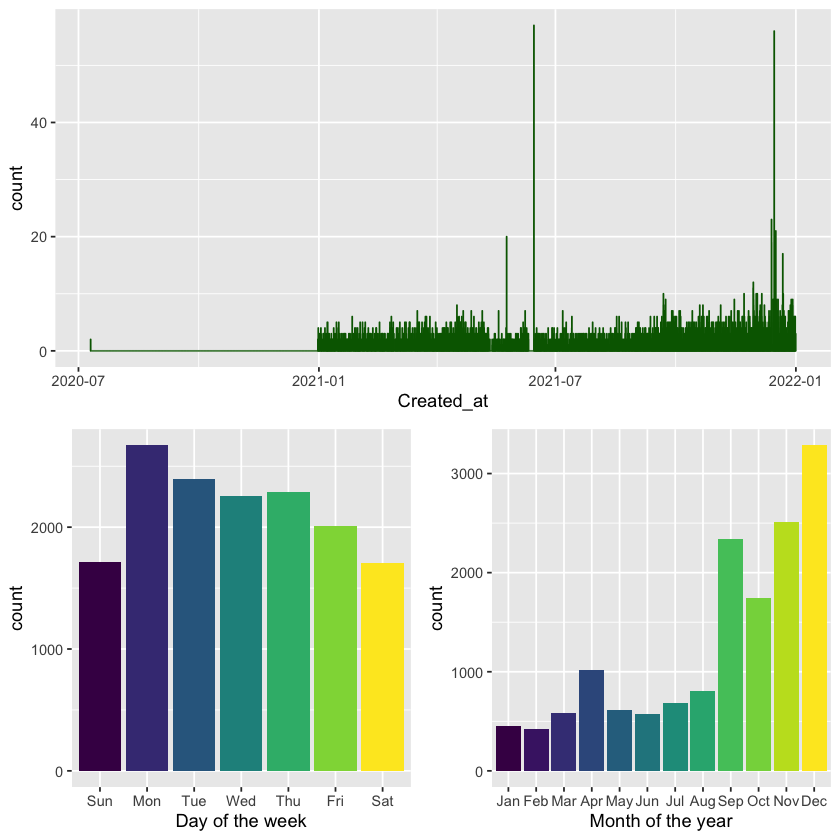

In [31]:
multiplot(d13, d14, d15, layout=layout)

In [32]:

d16 <- subscription_df %>%

  ggplot(aes(Cancelled_at)) +

  geom_freqpoly(color = "dark green", binwidth = 400)



d17 <- subscription_df %>%

  mutate(wday = wday(Cancelled_at, label = TRUE)) %>%

  ggplot(aes(wday, fill = wday)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Day of the week")



d18 <- subscription_df %>%

  #filter(First_order_created > ymd("20041231") & First_order_created < ymd("20170101")) %>%

  mutate(month = month(Cancelled_at, label = TRUE)) %>%

  ggplot(aes(month, fill = month)) +

  geom_bar() +

  theme(legend.position = "none") +

  labs(x = "Month of the year")



layout <- matrix(c(1,1,2,3),2,2,byrow=TRUE)



#### Distribution of when Subscriptions were Cancelled

Warning message:
“Removed 9991 rows containing non-finite values (stat_bin).”


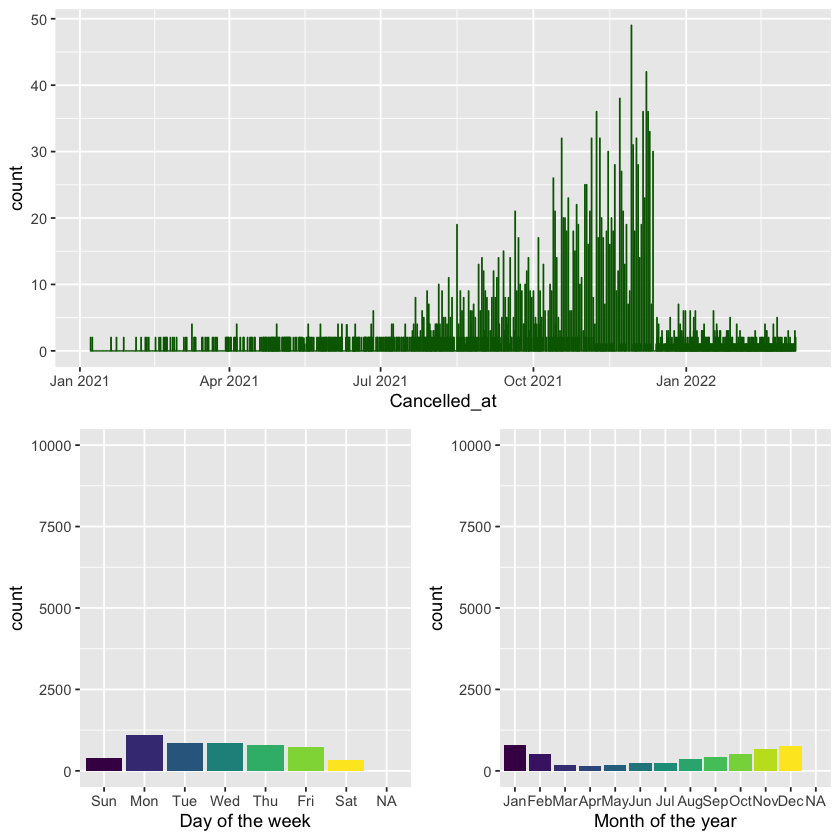

In [33]:
multiplot(d16, d17, d18, layout=layout)

### Data Transformation/Integration


<p>Merging table</p>
<ul>
    <li>First, we will join Customers and Subscription table, call it cust_ord_df</li>
    <li>Next, we will join Subscription table with cust_ord_df, call it all_data_df</li>
    </ul>
 <p> We will use inner join to avoid creating multiple Null values</p>

In [34]:
#cust_ord_df = customers_df %>% inner_join(subscription_df)

In [35]:
all_data_df = subscription_df %>% inner_join(orders_df) %>% inner_join(customers_df)

Joining, by = "Customer_id"
Joining, by = "Customer_id"


In [36]:
dim(all_data_df)

[1] 47383    20

In [37]:
all_data_df %>% summary()

 Product   Subscription_id       Created_at                 
 A:13528   Min.   : 89559464   Min.   :2020-07-10 07:32:30  
 B:33855   1st Qu.:150546747   1st Qu.:2021-04-30 09:15:14  
           Median :203282333   Median :2021-08-30 16:10:10  
           Mean   :185347772   Mean   :2021-08-01 04:34:29  
           3rd Qu.:203294070   3rd Qu.:2021-10-25 11:17:41  
           Max.   :207275137   Max.   :2021-12-31 18:45:23  
                                                            
  Cancelled_at                   Updated_at                        Status     
 Min.   :2021-01-07 10:37:25   Min.   :2020-12-31 07:39:31   Active   :31836  
 1st Qu.:2021-09-03 00:00:00   1st Qu.:2021-10-18 08:32:59   Cancelled:15509  
 Median :2021-11-08 00:00:00   Median :2021-12-13 08:36:35   Expired  :   32  
 Mean   :2021-10-25 12:36:07   Mean   :2021-10-28 03:27:30   Onetime  :    6  
 3rd Qu.:2021-12-29 08:44:05   3rd Qu.:2021-12-13 09:38:39                    
 Max.   :2022-03-07 19:49:32   Max.   

#### Observation: Data inconsistency
<ul><p>Limitations from Data</p>
<li>There are different cases in which multiple records were created which would require looking at all the records per table and combine multiple cases into one based on Customer ID/Subscription ID.</li>
    <li> Customers who Cancelled subscriptions multiple times  but their Status remains active until later Cancelled</li>
    <li> Customers who Cancelled subscriptions multiple times, Status cancelled and did not later re-activate </li>
 </ul>
 <ul>
    <li> it is difficult to determine the subscriptions that have lost data or partially collected </li>
</ul>

In [38]:
#print the first 6 rows

head(all_data_df)

,Product,Subscription_id,Created_at,Cancelled_at,Updated_at,Status,Current_status,Cancellation_reason,Customer_id,Order_id,Created_date,Fulfillment_date,Nb_a_bottles,Nb_b_bottles,Option,First_product,First_option,First_order_created,First_order_fulfilled,Channel_attribution
,<fct>,<int>,<dttm>,<dttm>,<dttm>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dttm>,<dttm>,<int>,<int>,<fct>,<fct>,<fct>,<dttm>,<dttm>,<fct>
1,A,203282516,2021-09-22 17:48:12,2022-03-07 19:49:32,2022-03-07 19:49:32,Cancelled,Cancelled,Other reason,Customer_8571,3.964377e+12,2021-09-22 15:47:58,2021-10-19 14:15:10,1,0,Membership,A,Membership,2021-09-22 15:47:58,2021-10-19 14:15:10,Podcast Interview
2,A,203282516,2021-09-22 17:48:12,2022-03-07 19:49:32,2022-03-07 19:49:32,Cancelled,Cancelled,Other reason,Customer_8571,4.061108e+12,2021-11-16 22:18:10,2021-11-29 15:46:41,1,0,Membership,A,Membership,2021-09-22 15:47:58,2021-10-19 14:15:10,Podcast Interview
3,A,203282516,2021-09-22 17:48:12,2022-03-07 19:49:32,2022-03-07 19:49:32,Cancelled,Cancelled,Other reason,Customer_8571,4.133717e+12,2021-12-31 00:27:40,2022-01-04 11:34:47,1,0,Membership,A,Membership,2021-09-22 15:47:58,2021-10-19 14:15:10,Podcast Interview
4,B,148108899,2021-04-20 19:20:35,2022-03-07 18:29:31,2022-03-07 18:29:31,Cancelled,Cancelled,Other reason,Customer_5185,3.720944e+12,2021-04-20 19:20:35,2021-05-18 16:02:16,0,1,Membership,B,Membership,2021-04-20 19:20:35,2021-05-18 16:02:16,NA
5,B,148108899,2021-04-20 19:20:35,2022-03-07 18:29:31,2022-03-07 18:29:31,Cancelled,Cancelled,Other reason,Customer_5185,3.806728e+12,2021-06-17 00:32:27,2021-06-21 16:04:24,0,1,Membership,B,Membership,2021-04-20 19:20:35,2021-05-18 16:02:16,NA
6,B,148108899,2021-04-20 19:20:35,2022-03-07 18:29:31,2022-03-07 18:29:31,Cancelled,Cancelled,Other reason,Customer_5185,3.852538e+12,2021-07-17 00:27:47,2021-07-19 16:03:25,0,1,Membership,B,Membership,2021-04-20 19:20:35,2021-05-18 16:02:16,NA


#### Data Cleaning - Variable Transformation and handling missing values

In [39]:
new_data_tmp = all_data_df #copy tempporary data for transformation

Change the column attributes for easy data manipulation

In [40]:
new_data_tmp$Current_status <- new_data_tmp$Current_status %>% as.character()
new_data_tmp$Cancellation_reason <- new_data_tmp$Cancellation_reason %>% as.character()
new_data_tmp$Cancelled_at <- new_data_tmp$Cancelled_at %>% as.character()
new_data_tmp$Channel_attribution <- new_data_tmp$Channel_attribution %>% as.character()

In [41]:
new_data_tmp$Cancellation_reason[is.na(new_data_tmp$Cancellation_reason) & new_data_tmp$Current_status == "Active"] = "Not Applicable" 

new_data_tmp$Cancelled_at[is.na(new_data_tmp$Cancelled_at) & new_data_tmp$Current_status == "Active"] <- " "

new_data_tmp$Cancellation_reason[is.na(new_data_tmp$Cancellation_reason)] <- "Other reason"
new_data_tmp$Channel_attribution[is.na(new_data_tmp$Channel_attribution)] <- "Other Channel"

dim(new_data_tmp)

[1] 47383    20

In [42]:
new_data_df = new_data_tmp #Again, we copied the transformed data and can explored further using it.

In [43]:
new_data_df = na.omit(new_data_df) #Delete null records

In [44]:
head(new_data_df,2)

,Product,Subscription_id,Created_at,Cancelled_at,Updated_at,Status,Current_status,Cancellation_reason,Customer_id,Order_id,Created_date,Fulfillment_date,Nb_a_bottles,Nb_b_bottles,Option,First_product,First_option,First_order_created,First_order_fulfilled,Channel_attribution
,<fct>,<int>,<dttm>,<chr>,<dttm>,<fct>,<chr>,<chr>,<fct>,<dbl>,<dttm>,<dttm>,<int>,<int>,<fct>,<fct>,<fct>,<dttm>,<dttm>,<chr>
1,A,203282516,2021-09-22 17:48:12,2022-03-07 19:49:32,2022-03-07 19:49:32,Cancelled,Cancelled,Other reason,Customer_8571,3.964377e+12,2021-09-22 15:47:58,2021-10-19 14:15:10,1,0,Membership,A,Membership,2021-09-22 15:47:58,2021-10-19 14:15:10,Podcast Interview
2,A,203282516,2021-09-22 17:48:12,2022-03-07 19:49:32,2022-03-07 19:49:32,Cancelled,Cancelled,Other reason,Customer_8571,4.061108e+12,2021-11-16 22:18:10,2021-11-29 15:46:41,1,0,Membership,A,Membership,2021-09-22 15:47:58,2021-10-19 14:15:10,Podcast Interview


In [45]:
new_data_df$subscription_cases <- paste(new_data_df$Current_status, new_data_df$Status)

In [46]:
table(new_data_df$subscription_cases)


      Active Active    Active Cancelled Cancelled Cancelled 
              21095                 184               13827 

In [47]:
new_data_df <- new_data_df[-21]

#### Combination of possible subscriptions events that occured 
 <ol>
    <li> AA - Active Active </li>
    <li> AC - Active Cancel </li>
    <li> CC - Cancelled Cancelled </li>
    <li> AA_AC_CC </li>
    <li> AA_CC_AC </li>
    <li> AC_AA_CC </li>
    <li>AC_CC_AA</li>
    <li>CC_AA_AC </li>
    <li>CC_AC_AA</li>
    
 </ol>

In [48]:
group_data <- new_data_df %>% 
                dplyr::select(Subscription_id, Product, Created_at, Cancelled_at, Updated_at, Status, Current_status, Cancellation_reason, Customer_id)
                
group_data$combine_status_cur <- paste(group_data$Status, group_data$Current_status)

new_group_data <- group_data[c("Subscription_id", "combine_status_cur")]

dim(group_data)


[1] 35106    10

In [49]:

unique_sub <- unique(new_group_data$Subscription_id)
len <- length(unique_sub)

data_df <-  data.frame(id = 1:len, Subscription_id = NA, combine_status_cur = NA)
i = 1
for(sub in unique_sub){
    new_group_data[new_group_data$Subscription_id == sub, "combine_status_cur"] %>% paste(collapse = " ") -> res
    data_df[i, ] = c(i, sub, res)
    i = i+1
}


In [50]:
#all active subscriptions ids with no cancellation. It seems these are automatic payment methods
all_active_subs <- data_df %>% filter(!str_detect(combine_status_cur, "Cancelled"))
dim(all_active_subs)
head(all_active_subs, 3)

[1] 4012    3

,id,Subscription_id,combine_status_cur
,<chr>,<chr>,<chr>
1,7,203298307,Active Active Active Active Active Active Active Active
2,9,206041918,Active Active Active Active Active Active Active Active
3,33,206720151,Active Active Active Active Active Active Active Active Active Active Active Active


In [51]:
#never active subscriptions ids with no cancellation.
all_cancelled_subs <- data_df %>% filter(!str_detect(combine_status_cur, "Active"))
dim(all_cancelled_subs)
head(all_cancelled_subs, 3)

[1] 4078    3

,id,Subscription_id,combine_status_cur
,<chr>,<chr>,<chr>
1,1,203282516,Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled
2,2,148108899,Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled
3,3,203290744,Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled Cancelled


In [52]:
#multiple active and cancelled subscriptions ids
all_cancelled_active_subs <- data_df %>% filter(grepl("Active", combine_status_cur) & grepl("Cancelled", combine_status_cur)) 
dim(all_cancelled_active_subs)
head(all_cancelled_active_subs, 3)

[1] 46  3

,id,Subscription_id,combine_status_cur
,<chr>,<chr>,<chr>
1,10,203761366,Active Active Active Active Active Active Cancelled Active
2,81,203296028,Cancelled Active Cancelled Active Cancelled Active Active Active Active Active Active Active Active Active Active Active Active Active
3,89,203298439,Active Active Active Active Active Active Active Active Active Active Active Active Cancelled Active Cancelled Active Cancelled Active


In [53]:
new_all_cancelled_subs <- all_cancelled_subs
new_all_cancelled_subs[c(1,3)] <- list(NULL) 
new_all_cancelled_subs$Subscription_id  <- new_all_cancelled_subs$Subscription_id %>% as.integer()


In [54]:
new_all_cancelled_subs <- new_all_cancelled_subs %>% inner_join(subscription_df)

new_all_cancelled_subs_clean <- subset(new_all_cancelled_subs, !is.na(Cancelled_at))
dim(new_all_cancelled_subs_clean)

Joining, by = "Subscription_id"


[1] 4772    9

In [55]:
all_cancelled_active_subs$last_event = NA

for (i in 1:nrow(all_cancelled_active_subs)){
    res = all_cancelled_active_subs[i, "combine_status_cur"]
    res = strsplit(res, " ")
    res = as.vector(res[[1]])
    
    if (length(res) > 1){
        
       res = res[(length(res)-1):length(res)]

    }
    all_cancelled_active_subs[i, "last_event"] = paste(res, collapse = " ")

}


In [56]:
last_event_data <- all_cancelled_active_subs %>% filter(grepl("Active", last_event) & grepl("Cancelled", last_event))
last_event_data$Subscription_id <- as.integer(last_event_data$Subscription_id)
head(last_event_data, 3)
 

,id,Subscription_id,combine_status_cur,last_event
,<chr>,<int>,<chr>,<chr>
1,10,203761366,Active Active Active Active Active Active Cancelled Active,Cancelled Active
2,89,203298439,Active Active Active Active Active Active Active Active Active Active Active Active Cancelled Active Cancelled Active Cancelled Active,Cancelled Active
3,92,203301942,Active Active Cancelled Active,Cancelled Active


In [57]:
last_event_data_sub <- last_event_data
last_event_data_sub[c(1,3)] <- list(NULL)


In [87]:
all_active_cancelled_subs_data <- last_event_data_sub %>% inner_join(subscription_df)

active_cancelled_subs_data_clean <- subset(all_active_cancelled_subs_data, !is.na(Cancelled_at))
dim(active_cancelled_subs_data_clean)
active_cancelled_subs_data_clean


Joining, by = "Subscription_id"


[1] 13 10

,Subscription_id,last_event,Product,Created_at,Cancelled_at,Updated_at,Status,Current_status,Cancellation_reason,Customer_id
,<int>,<chr>,<fct>,<dttm>,<dttm>,<dttm>,<fct>,<fct>,<fct>,<fct>
4,203761366,Cancelled Active,A,2021-12-14 13:17:31,2022-01-05 10:16:31,2022-01-05 10:16:31,Cancelled,Active,This is too expensive,Customer_5147
7,203298439,Cancelled Active,A,2021-09-10 15:53:27,2021-11-29 00:00:00,2021-12-13 09:34:53,Cancelled,Active,No longer uses product,Customer_6942
9,203301942,Cancelled Active,A,2021-10-19 12:26:55,2021-12-12 00:00:00,2021-12-13 09:48:37,Cancelled,Active,This product is too expensive,Customer_3750
14,148793401,Cancelled Active,B,2021-04-23 09:17:58,2021-11-10 07:24:26,2021-11-10 07:24:25,Cancelled,Active,Other reason,Customer_1606
17,203284072,Cancelled Active,A,2021-09-18 19:30:35,2021-11-30 00:00:00,2021-12-13 08:32:53,Cancelled,Active,I no longer have any use for this product and I will not need it in the near future,Customer_4887
19,203298787,Cancelled Active,A,2021-09-05 19:27:34,2021-10-19 00:00:00,2021-12-13 09:36:19,Cancelled,Active,This product is too expensive,Customer_9096
21,203282575,Cancelled Active,B,2021-08-30 14:04:51,2021-12-06 00:00:00,2021-12-13 08:26:51,Cancelled,Active,This product is too expensive,Customer_9392
23,203298678,Cancelled Active,B,2021-07-12 11:16:02,2021-11-03 00:00:00,2021-12-13 09:35:52,Cancelled,Active,I stopped using this product,Customer_6214
26,203275237,Cancelled Active,B,2021-11-22 14:07:06,2021-12-12 00:00:00,2021-12-13 07:57:01,Cancelled,Active,This product is too expensive,Customer_25


#### There are 4078 different subscription ids with never active subscriptions

#### There are 4012 different subscription ids with never cancelled subscriptions

#### We have 46 events of different actions of Cancelled and Active subscriptions. We will investigate further for insights.

#### There are 13 subscriptions whose last events were Cancellation of subscriptions

In [59]:
#Detailed Reasons for Cancellation. It requires Text Mining Analysis for further analysis
deatailed_reason <- active_cancelled_subs_data_clean$Cancellation_reason 
#deatailed_reason #uncomment and run this for more details on cancellation reasons

In [60]:
new_data2_df <- new_data_df %>% 
    mutate(Subscription_cancelled = ifelse(((Current_status == "Cancelled" & Status=="Cancelled") | (Current_status == "Active" & Status=="Cancelled")), "Yes","No"))


In [61]:
dim(new_data2_df) #check the shape of new data


[1] 35106    21

In [62]:
unique_data <- new_data2_df[!duplicated(new_data2_df[ , c("Subscription_id")]),]
dim(unique_data)

[1] 8136   21

#### One of the things we aim to look is, if Back order contributes to Cancellation
<p> Back_order - If the difference between Fulfilment date and Order Created Date is more than 10 days
     </p>
<p>Scubscription_cancelled - if Status is Cancelled </p>

In [63]:
#create back-order variable
unique_data$Back_order_days <- difftime(unique_data$Fulfillment_date, unique_data$Created_date, units = "days")

In [64]:
unique_data <- unique_data %>% 
    mutate(Back_order_status =ifelse(Back_order_days>10, "Yes","No"))
head(unique_data, 2)

,Product,Subscription_id,Created_at,Cancelled_at,Updated_at,Status,Current_status,Cancellation_reason,Customer_id,Order_id,⋯,Nb_b_bottles,Option,First_product,First_option,First_order_created,First_order_fulfilled,Channel_attribution,Subscription_cancelled,Back_order_days,Back_order_status
,<fct>,<int>,<dttm>,<chr>,<dttm>,<fct>,<chr>,<chr>,<fct>,<dbl>,⋯,<int>,<fct>,<fct>,<fct>,<dttm>,<dttm>,<chr>,<chr>,<drtn>,<chr>
1,A,203282516,2021-09-22 17:48:12,2022-03-07 19:49:32,2022-03-07 19:49:32,Cancelled,Cancelled,Other reason,Customer_8571,3.964377e+12,⋯,0,Membership,A,Membership,2021-09-22 15:47:58,2021-10-19 14:15:10,Podcast Interview,Yes,26.93556 days,Yes
4,B,148108899,2021-04-20 19:20:35,2022-03-07 18:29:31,2022-03-07 18:29:31,Cancelled,Cancelled,Other reason,Customer_5185,3.720944e+12,⋯,1,Membership,B,Membership,2021-04-20 19:20:35,2021-05-18 16:02:16,Other Channel,Yes,27.86228 days,Yes


In [65]:
cat_graph9 <- unique_data %>%

  ggplot(aes(Back_order_status, fill = Back_order_status)) +

  geom_bar() +

  theme(legend.position = "none")
 

cat_graph10 <- unique_data %>%

  ggplot(aes(Subscription_cancelled, fill = Subscription_cancelled)) +

  geom_bar() +

  theme(legend.position = "none")


layout <- matrix(c(1,1,2,2),2,4, byrow=TRUE)

#### Count of Back order Visualization (left), Subscription Cancelled (right)

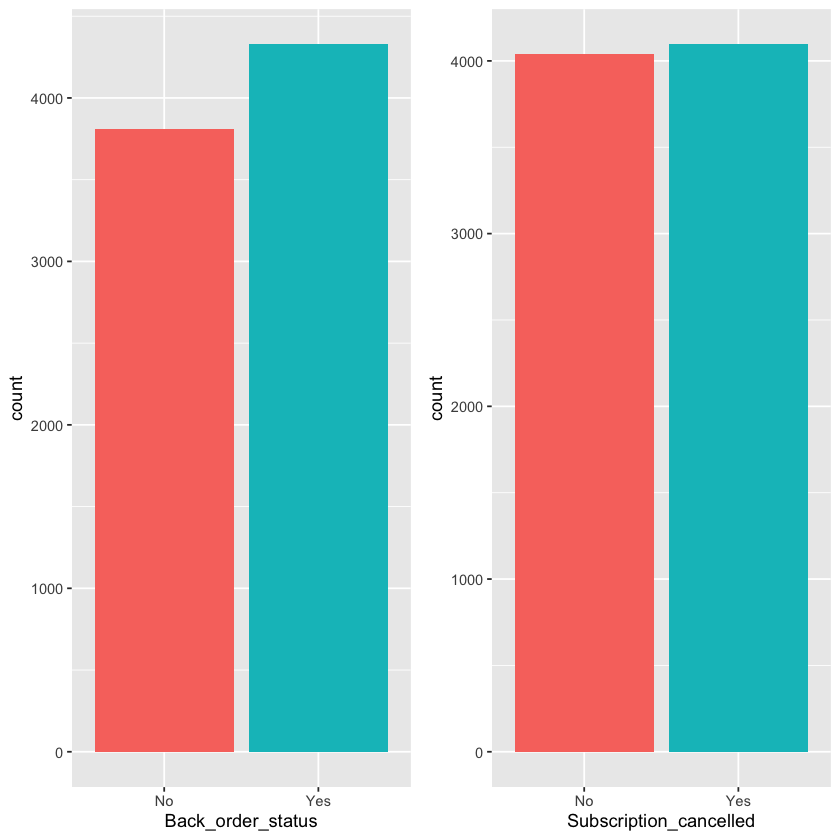

In [66]:
multiplot(cat_graph9, cat_graph10, layout=layout)

### Data set relations/Bivariate Analysis
<ul><li>How large a percentage of subscriptions were cancalled?</li>
    <li>Measure of Interdependence between variables and the variable of interest</li>
<li>Do Back order, Product, or other variables have direct relationships with Cancellation of subscription?</li>
</ul>

In [67]:
print("Back order staus vs Subscription cancellation")
(UncertCoef(unique_data$Back_order_status, unique_data$Subscription_cancelled, direction="symmetric"))*100

bsc = chisq.test(unique_data$Back_order_status, unique_data$Subscription_cancelled)

prop.table(bsc$expected)*100


[1] "Back order staus vs Subscription cancellation"


[1] 0.02130773

,No,Yes
No,23.25294,23.56367
Yes,26.41520,26.76818


<ul>
    <li>Back order has about 0.02% correlation with Subscription cancellation. It does not seem to have a direct relationship with Subscription cancellation.</li>
    <li>About 23.42% of the Back orders did not lead to Subscription cancellation</li>
    <li>About 26.77% Back orders led to Subscription cancellation</li>
    <li>There is about 23.56% who did not have Back orders and still cancelled</li>
    <li>About 23.25% did not have Back orders and did not cancel</li>
    </ul>

In [68]:
print("Product vs Subscription cancellation")
(UncertCoef(unique_data$Product, unique_data$Subscription_cancelled, direction="symmetric"))*100

psc = chisq.test(unique_data$Product, unique_data$Subscription_cancelled)

prop.table(psc$expected)*100

[1] "Product vs Subscription cancellation"


[1] 1.896308

,No,Yes
A,19.65115,19.91375
B,30.01699,30.41811


<ul>
    <li>Product has about 1.90% correlation with Subscription cancellation. It does not seem to have a strong direct relationship with Subscription cancellation.</li>
    <li>About 19.91% who subscribed to the product A cancelled their subscription </li>
    <li>About 30.42% who subscribed to product B cancelled their subscription</li>
    <li>Even though there is a little correlation between product and subscription cancellation, product B subscribers cancelled more than product A subscribers</li>
    </ul>

In [69]:

(UncertCoef(unique_data$Current_status, unique_data$Status, direction="symmetric"))*100
pta = chisq.test(unique_data$Current_status, unique_data$Status)

prop.table(pta$expected)*100


[1] 98.04728

,Active,Cancelled
Active,24.77302,25.10407
Cancelled,24.89512,25.22779


<ul> <p>Customers who cancelled their subscription:
    <li>About 98.05% correlation with Subscription cancellation. It appears there is a very strong direct relationship Status and Current Status</li>
    <li>About 25.10% subscriptions were cancelled before membership subscription expires </li>
    <li>24.77% subscriptions were active</li>
    <li>25.23% subscriptions were cancelled</li>
    </ul>

## Model Development

### Feature Selection - Still looking...

I consider using Logistic Regression Method

In [70]:
#variable selections
names(unique_data)

data_backup = unique_data

[1] "Product"                "Subscription_id"        "Created_at"            
 [4] "Cancelled_at"           "Updated_at"             "Status"                
 [7] "Current_status"         "Cancellation_reason"    "Customer_id"           
[10] "Order_id"               "Created_date"           "Fulfillment_date"      
[13] "Nb_a_bottles"           "Nb_b_bottles"           "Option"                
[16] "First_product"          "First_option"           "First_order_created"   
[19] "First_order_fulfilled"  "Channel_attribution"    "Subscription_cancelled"
[22] "Back_order_days"        "Back_order_status"

In [71]:
unique_data$Subscription_cancelled = ifelse(unique_data$Subscription_cancelled == "No", 0, 1)

#new_data_df$Subscription_cancelled = as.factor(new_data_df$Subscription_cancelled)

In [72]:
class(unique_data$Subscription_cancelled)

unique_data$Back_order = ifelse(unique_data$Back_order_status == "No", 0, 1)
head(unique_data)

[1] "numeric"

,Product,Subscription_id,Created_at,Cancelled_at,Updated_at,Status,Current_status,Cancellation_reason,Customer_id,Order_id,⋯,Option,First_product,First_option,First_order_created,First_order_fulfilled,Channel_attribution,Subscription_cancelled,Back_order_days,Back_order_status,Back_order
,<fct>,<int>,<dttm>,<chr>,<dttm>,<fct>,<chr>,<chr>,<fct>,<dbl>,⋯,<fct>,<fct>,<fct>,<dttm>,<dttm>,<chr>,<dbl>,<drtn>,<chr>,<dbl>
1,A,203282516,2021-09-22 17:48:12,2022-03-07 19:49:32,2022-03-07 19:49:32,Cancelled,Cancelled,Other reason,Customer_8571,3.964377e+12,⋯,Membership,A,Membership,2021-09-22 15:47:58,2021-10-19 14:15:10,Podcast Interview,1,26.9355556 days,Yes,1
4,B,148108899,2021-04-20 19:20:35,2022-03-07 18:29:31,2022-03-07 18:29:31,Cancelled,Cancelled,Other reason,Customer_5185,3.720944e+12,⋯,Membership,B,Membership,2021-04-20 19:20:35,2021-05-18 16:02:16,Other Channel,1,27.8622801 days,Yes,1
12,B,203290744,2021-06-09 14:04:43,2022-03-07 18:25:30,2022-03-07 18:25:29,Cancelled,Cancelled,This is too expensive,Customer_8476,3.795641e+12,⋯,Membership,B,Membership,2021-06-09 12:04:31,2021-06-14 16:07:40,Facebook,1,5.1688542 days,No,0
19,A,203288690,2021-12-06 07:49:16,2022-03-07 19:02:38,2022-03-07 19:02:38,Cancelled,Cancelled,Other reason,Customer_5865,4.098353e+12,⋯,Membership,A,Membership,2021-12-06 05:48:36,2021-12-27 16:50:27,Social,1,21.4596181 days,Yes,1
20,B,203288823,2021-08-31 14:14:50,2022-03-07 19:00:23,2022-03-07 19:00:22,Cancelled,Cancelled,The product didn't work for me,Customer_6207,3.867128e+12,⋯,OTP,B,OTP,2021-07-27 08:35:12,2021-07-27 16:01:26,Other Channel,1,0.3098843 days,No,0
26,B,203278484,2021-10-14 12:18:00,2022-03-07 19:47:53,2022-03-07 19:47:53,Cancelled,Cancelled,Other reason,Customer_8872,4.002124e+12,⋯,Membership,B,Membership,2021-10-14 10:17:41,2021-11-04 15:29:55,Podcast Interview,1,21.2168287 days,Yes,1


In [73]:
model1 = glm(Subscription_cancelled ~ Product + Nb_a_bottles + Nb_b_bottles
             + Option + Back_order, 
             data = unique_data, family = binomial)

In [74]:
stepAIC(model1)

Start:  AIC=11029.81
Subscription_cancelled ~ Product + Nb_a_bottles + Nb_b_bottles + 
    Option + Back_order

               Df Deviance   AIC
- Nb_a_bottles  1    11018 11028
<none>               11018 11030
- Nb_b_bottles  1    11022 11032
- Option        1    11039 11049
- Back_order    1    11048 11058
- Product       1    11111 11121

Step:  AIC=11028.03
Subscription_cancelled ~ Product + Nb_b_bottles + Option + Back_order

               Df Deviance   AIC
<none>               11018 11028
- Nb_b_bottles  1    11022 11030
- Option        1    11040 11048
- Back_order    1    11049 11057
- Product       1    11124 11132



Call:  glm(formula = Subscription_cancelled ~ Product + Nb_b_bottles + 
    Option + Back_order, family = binomial, data = unique_data)

Coefficients:
 (Intercept)      ProductB  Nb_b_bottles     OptionOTP    Back_order  
     -0.6085        0.6963        0.1079       -0.4514        0.2807  

Degrees of Freedom: 8135 Total (i.e. Null);  8131 Residual
Null Deviance:	    11280 
Residual Deviance: 11020 	AIC: 11030

### Metric for feature selection - The model with the lowest Akaike Information Criterio (AIC) is selected

#### Cross-validation

In [75]:
sample_size <- floor(0.65 * nrow(unique_data)) #select 65% of the data

In [76]:
set.seed(11)
train_data <- sample(seq_len(nrow(unique_data)), size = sample_size)

train <- unique_data[train_data, ]
test <- unique_data[-train_data, ]

#### Fitting the Data with the train data

In [77]:
final_model = glm(Subscription_cancelled ~ Product + Nb_b_bottles + 
    Option + Back_order, family = binomial, data = train)

summary(final_model)


Call:
glm(formula = Subscription_cancelled ~ Product + Nb_b_bottles + 
    Option + Back_order, family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.044  -1.194  -0.803   1.119   1.666  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.66721    0.07014  -9.512  < 2e-16 ***
ProductB      0.67013    0.08204   8.169 3.12e-16 ***
Nb_b_bottles  0.13501    0.06517   2.072 0.038302 *  
OptionOTP    -0.43428    0.11771  -3.689 0.000225 ***
Back_order    0.33413    0.06328   5.280 1.29e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7330.6  on 5287  degrees of freedom
Residual deviance: 7162.5  on 5283  degrees of freedom
AIC: 7172.5

Number of Fisher Scoring iterations: 4


#### Predict using the test data

In [78]:
glm.probs <- predict(final_model, newdata = test, type="response")

glm.pred <- ifelse(glm.probs > 0.5, "Yes", "No")

test_sub <- ifelse(test$Subscription_cancelled == 0, "No", "Yes")

test_sub <- as.factor(test_sub)
glm.pred <- as.factor(glm.pred)

In [79]:
confusionMatrix(glm.pred, test_sub, positive='Yes')

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  706 497
       Yes 679 966
                                          
               Accuracy : 0.5871          
                 95% CI : (0.5687, 0.6052)
    No Information Rate : 0.5137          
    P-Value [Acc > NIR] : 2.233e-15       
                                          
                  Kappa : 0.1706          
                                          
 Mcnemar's Test P-Value : 1.306e-07       
                                          
            Sensitivity : 0.6603          
            Specificity : 0.5097          
         Pos Pred Value : 0.5872          
         Neg Pred Value : 0.5869          
             Prevalence : 0.5137          
         Detection Rate : 0.3392          
   Detection Prevalence : 0.5776          
      Balanced Accuracy : 0.5850          
                                          
       'Positive' Class : Yes             
                              

In [80]:
misclassification_rate <- (679/8136)*100
misclassification_rate

[1] 8.345624

In [81]:
#probability of cancellation
prob_cancel <- (966/(679+966))*100
prob_cancel

[1] 58.7234

#### Modelling Conclusion and Inferences
<ul>
    
   <li>From the model building, Back_order is highly significant in predicting the Cancellation of subscriptions having a p-value of approximately zero.</li>
    <li> Product B is also highly significant with the p-value of approximately zero</li>
    <li> OTP option is also highly significant with the p-value of approximately zero </li>
    <li>No of product B bottles is also significant in predicting Cancellation of subscriptions with a p-value of 0.0352</li>
    <li> 50% threshold is used. i.e. the probability that a customer will cancel subscription given Product B, OPT option, No of product B, Back order is set to be greater than 0.5 </li>

</ul>

#### Model -> log(p(X)/(1-p(X)) = -0.66721 + 0.67013*ProductB + 0.13501*Nb_b_bottles + -0.43428*OptionOPT + 0.33413*Back_order<br>
<ul><li>A one day increase in Back order will increase the odds of Subscription cancellation by 0.33413</li>
    <li>It is obvious from the EDA that the interdependence (direct relationship) between these variables and the cancellation of subscription are not strong, so it is not suprising that the effect size are not strong </li>
       <li>Probability of Cancellation is 58.72% </li>
    <li>There is 8.35% misclassfication error for the Cancelled Subscription.</li>
    </ul>



#### The 95% confidence interval around this prediction is (0.5687, 0.6052)

   #### Analysis Limitations
   <ul>
   <li> Another analysis would be required to compare the classification of Subscription cancellation with outliers and no outliers</li>
   </ul>

## Author - Hammed Lawal
## Thank you!!!

In [82]:
#active_cancelled_subs_data_clean <- active_cancelled_subs_data_clean[-2]

In [83]:
# modelling data with just  never active, and active and cancelled subscriptions data
#combine_subs <- rbind(new_all_cancelled_subs_clean, active_cancelled_subs_data_clean)

In [84]:
#model_data <- combine_subs %>% inner_join(orders_df)
#model_data2 <- unique(model_data)